In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC 

In [10]:
data = pd.read_csv("Resume.csv")

In [11]:
data

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


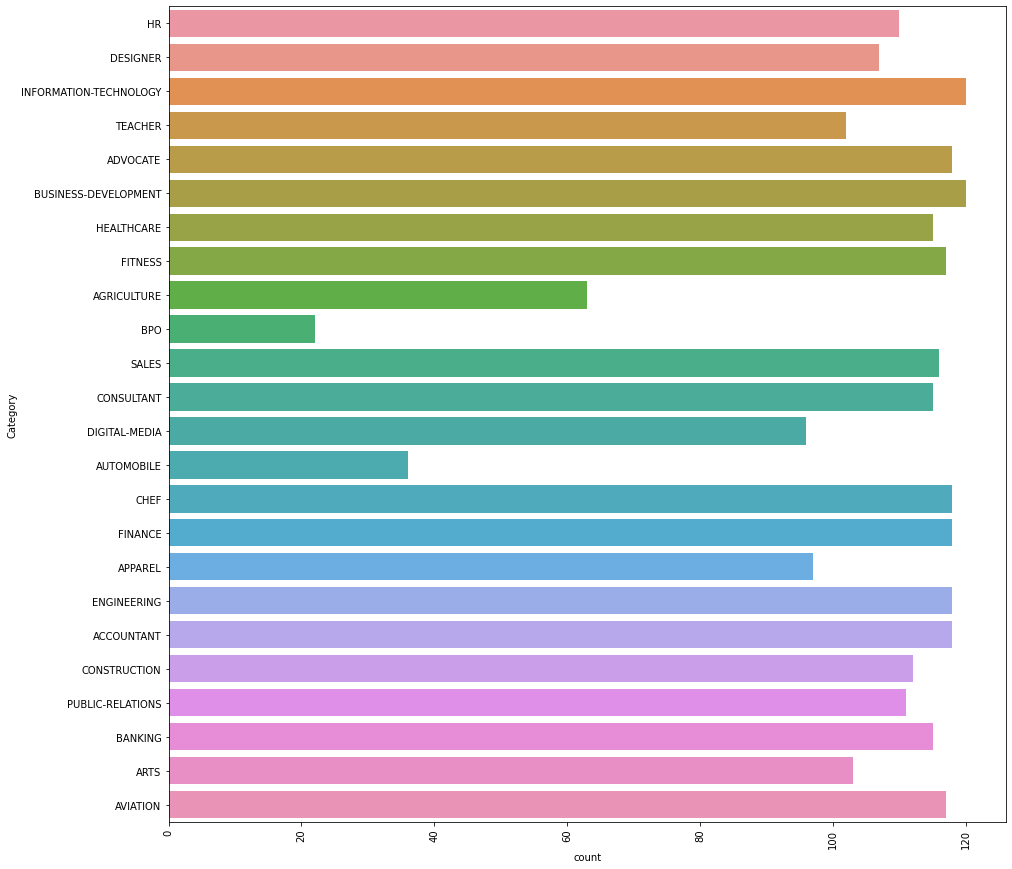

In [12]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category', data=data)
plt.savefig('bargraph.png')

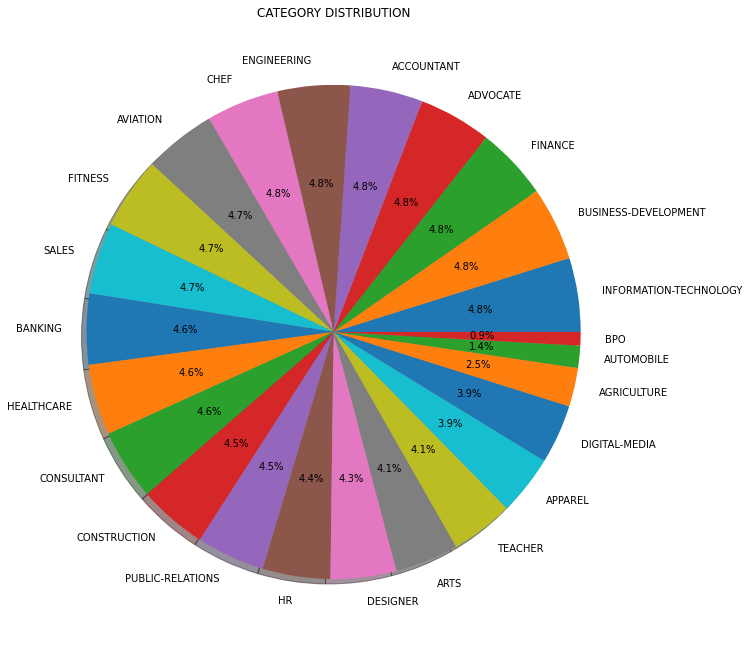

In [13]:
#Pie-chart
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, )
plt.savefig('category.png')

In [15]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
data['cleaned_resume'] = data.Resume_str.apply(lambda x: cleanResume(x))

In [16]:
df = data.drop(['ID', 'Resume_html'], axis=1)
df.rename(columns = {'Resume_str':'Resume'}, inplace = True)

In [17]:
df

,Resume,Category,cleaned_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,HR ADMINISTRATOR MARKETING ASSOCIATE ...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,HR SPECIALIST US HR OPERATIONS ...
2,HR DIRECTOR Summary Over 2...,HR,HR DIRECTOR Summar Over 2...
3,HR SPECIALIST Summary Dedica...,HR,HR SPECIALIST Summar Dedica...
4,HR MANAGER Skill Highlights ...,HR,HR MANAGER Skill Highlight ...
...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION,RANK SGT E 5 NON COMMISSIONED OFFIC...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION,GOVERNMENT RELATIONS COMMUNICATIONS ...
2481,GEEK SQUAD AGENT Professional...,AVIATION,GEEK SQUAD AGENT Profe ional ...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION,PROGRAM DIRECTOR OFFICE MANAGER ...


In [18]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [19]:
requiredText = df['cleaned_resume'].values
requiredTarget = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(1863, 1500)
(621, 1500)


In [ ]:
#clf = OneVsRestClassifier(KNeighborsClassifier())
#clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)

In [21]:
clf = SVC(kernel='rbf', random_state = 1)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

In [22]:
print('Accuracy of training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of training set: 0.98
Accuracy of test set: 0.60


In [23]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71        26
           1       0.51      0.69      0.59        29
           2       0.75      0.14      0.23        22
           3       0.45      0.36      0.40        25
           4       0.21      0.11      0.14        28
           5       0.00      0.00      0.00         6
           6       0.91      0.78      0.84        37
           7       0.61      0.77      0.68        26
           8       0.00      0.00      0.00         9
           9       0.63      0.78      0.70        37
          10       0.88      0.81      0.84        26
          11       0.67      0.70      0.68        23
          12       0.27      0.25      0.26        28
          13       0.89      0.71      0.79        24
          14       0.50      0.50      0.50        14
          15       0.69      0.69      0.69        39
          16       0.65      0.39      0.49        33
          17       0.91    

In [24]:
le.classes_

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [25]:
df

,Resume,Category,cleaned_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,19,HR ADMINISTRATOR MARKETING ASSOCIATE ...
1,"HR SPECIALIST, US HR OPERATIONS ...",19,HR SPECIALIST US HR OPERATIONS ...
2,HR DIRECTOR Summary Over 2...,19,HR DIRECTOR Summar Over 2...
3,HR SPECIALIST Summary Dedica...,19,HR SPECIALIST Summar Dedica...
4,HR MANAGER Skill Highlights ...,19,HR MANAGER Skill Highlight ...
...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,6,RANK SGT E 5 NON COMMISSIONED OFFIC...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",6,GOVERNMENT RELATIONS COMMUNICATIONS ...
2481,GEEK SQUAD AGENT Professional...,6,GEEK SQUAD AGENT Profe ional ...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,6,PROGRAM DIRECTOR OFFICE MANAGER ...
